In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Задание на визуализацию.xlsx', sheet_name = 1, usecols = 'A:E', engine='openpyxl')

In [3]:
data.head()

,calendar_dt,business_line,system_source,dozv_flg,cnt_calls
0,2020-01-01,Другие,Oфис,0,8368
1,2020-01-01,Физические лица,TCRM,1,57
2,2020-01-01,Телемаркетинг,Oфис,0,80
3,2020-01-01,Продажи,Облако,1,637
4,2020-01-01,Бэк-офис,Oфис,0,61


___

__1. График, показывающий доли дозвонов (?) в зависимости от бизнес линии__

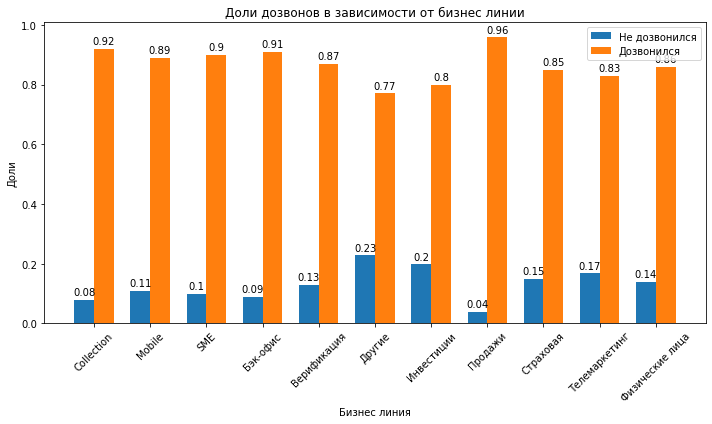

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

xxx_plot = pd.DataFrame(data.groupby(['business_line', 'dozv_flg'])['cnt_calls'].sum().unstack(level = -1))
xxx_plot['all_calls'] = xxx_plot[0] + xxx_plot[1]
xxx_plot['0_rate'] = pd.Series(np.round(xxx_plot[0] / xxx_plot['all_calls'], 2))
xxx_plot['1_rate'] = pd.Series(np.round(xxx_plot[1] / xxx_plot['all_calls'], 2))

labels = list(xxx_plot.index)
no_ = xxx_plot['0_rate']
yes_ = xxx_plot['1_rate']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width/2, no_, width, label = 'Не дозвонился')
rects2 = ax.bar(x + width/2, yes_, width, label = 'Дозвонился')

ax.set_xlabel('Бизнес линия')
ax.set_ylabel('Доли')
ax.set_title('Доли дозвонов в зависимости от бизнес линии')
ax.set_xticks(x)
ax.xaxis.set_tick_params(rotation = 45)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext = (0, 2),
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

__2. График, показывающий доли дозвонов (?) в зависимости от источника__

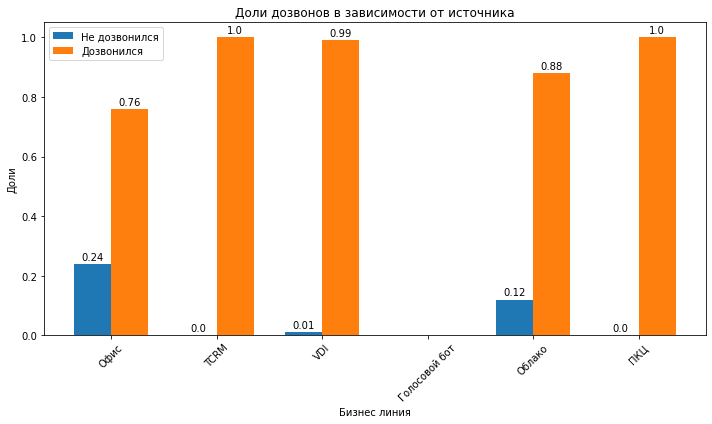

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

xxx_plot = pd.DataFrame(data.groupby(['system_source', 'dozv_flg'])['cnt_calls'].sum().unstack(level = -1))
xxx_plot['all_calls'] = xxx_plot[0] + xxx_plot[1]
xxx_plot['0_rate'] = pd.Series(np.round(xxx_plot[0] / xxx_plot['all_calls'], 2))
xxx_plot['1_rate'] = pd.Series(np.round(xxx_plot[1] / xxx_plot['all_calls'], 2))

labels = list(xxx_plot.index)
no_ = xxx_plot['0_rate']
yes_ = xxx_plot['1_rate']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width/2, no_, width, label = 'Не дозвонился')
rects2 = ax.bar(x + width/2, yes_, width, label = 'Дозвонился')

ax.set_xlabel('Бизнес линия')
ax.set_ylabel('Доли')
ax.set_title('Доли дозвонов в зависимости от источника')
ax.set_xticks(x)
ax.xaxis.set_tick_params(rotation = 45)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext = (0, 2),
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [6]:
# Некорректно отобразилась статистика для голосового бота. Проверяем, что там
xxx_plot[xxx_plot.index == 'Голосовой бот'] # он ни разу не дозвонился

dozv_flg,0,1,all_calls,0_rate,1_rate
system_source,,,,,
Голосовой бот,218889.0,NaN,NaN,NaN,NaN


__3. Выводы:__
* По графикам можно сделать вывод, что доля ситуаций, когда не получилось дозвониться, очень мала в независимости от того, каким методом производился звонок (за исключением одного случая) и для какой бизнес линии.
* По первому графику видно, что направление продаж является самым успешным с точки зрения дозвонов.
* По второму графику видно, что TCRM и ПКЦ являются самыми успешными источниками, в то время как голосовой бот не смог дозвониться ни одного раза.